In [1]:
import pandas as pd
import numpy as np

In [2]:
# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Getting data

In [3]:
raw_df_sales = pd.read_csv('Sales TEC_Valid.csv')
raw_df_flights = pd.read_csv('Filghts TEC_Valid.csv')

In [4]:
raw_df_sales

,Flight_ID,ProductType,ProductName,Quantity,TotalSales
0,a05290288259526edd3601160b10e1de,Botanas,Carne Seca Habanero,1,55.0
1,08f6f97437df8db101b050f1110be656,Licores,Jw Red Label,2,240.0
2,4e09c949826a77207868412baeff6d30,Licores,Jack And Coke,8,576.0
3,c3e1568fe46c68d3174681d322d412b3,Licores,Jw Red Label,2,240.0
4,7396e43fb94caca87add7bb1f1611e7e,Vivabus,Vivabus_Gdl.-Nvo. C. Camionera,4,320.0
...,...,...,...,...,...
2564356,638cf1904f936c50aea4a6f123ee07cf,Licores,Vino Tinto Sangre De Toro,1,155.0
2564357,04c5a19b8382a888d5c4c7b4932e783e,Licores,Vino Tinto Sangre De Toro,1,155.0
2564358,0291f6b201d2b24717a8ed7ca04f2d90,Licores,Vino Tinto Sangre De Toro,1,155.0
2564359,a10e3ac614fd434d6312897e07727c08,Licores,Vino Tinto Sangre De Toro,1,155.0


In [5]:
raw_df_sales['Flight_ID'].value_counts()

Flight_ID
09a295c868301fe15df13d8411cd4d37    73
4c65ba84403c407f59258b9ad414e40d    73
a44008629d97a1b4c9b6e0980ae8b11a    73
edbdab3c1c0df3d2b2213343fb9144eb    73
b6a39758032c87d2e315889e36b97277    72
                                    ..
f2465510de764876990745d47318a738     1
711ce349c0a794ee3494117087c6b695     1
aefe084856ab01dcf3dce794ed86950a     1
aa99acae1543c08c933b8fc7f28ca131     1
6a73f28314810ec3033e399c2b69f99d     1
Name: count, Length: 108964, dtype: int64

In [6]:
raw_df_flights['Flight_ID'].value_counts()

Flight_ID
d2093576a84c20bb81f426f1596a0e5c    4
cef6967e06ea83bc034d930103ebeeb4    4
b06b98362e89b5360ae2a5aa347395a1    4
e2651400ed678a0ee389b5cbdaf5f6bf    4
d04b6f2ab7f5a26767ccb7fbc00ec9f4    4
                                   ..
a3dd57cd4a3f2b14196dde6bc17be33f    1
e7cfad60f0d6c0f10219f2005002eb2e    1
aa0bd8a92c80cff34575fec5068cfaf9    1
e1f5a17f4e9722263f07e70434b66825    1
3c15779202b13158f78e8a8afe377250    1
Name: count, Length: 238055, dtype: int64

### Cleaning headers

In [7]:
raw_df_sales.columns

Index(['Flight_ID', 'ProductType', 'ProductName', 'Quantity', 'TotalSales'], dtype='object')

In [8]:
df_sales = raw_df_sales.rename(columns=
                     {
                         'Flight_ID':'flight_id',
                         'ProductType':'product_type',
                         'ProductName':'product_name',
                         'Quantity':'quantity',
                         'TotalSales':'total_sales'
                     })

In [9]:
df_sales.columns

Index(['flight_id', 'product_type', 'product_name', 'quantity', 'total_sales'], dtype='object')

In [10]:
raw_df_flights.columns

Index(['Flight_ID', 'Aeronave', 'DepartureStation', 'ArrivalStation',
       'Destination_Type', 'Origin_Type', 'STD', 'STA', 'Capacity',
       'Passengers', 'Bookings'],
      dtype='object')

In [11]:
df_flights = raw_df_flights.rename(columns=
                     {
                         'Flight_ID':'flight_id',
                         'Aeronave':'aeronave',
                         'DepartureStation':'departure_station',
                         'ArrivalStation':'arrival_station',
                         'Destination_Type':'destination_type',
                         'Origin_Type':'origin_type',
                         'STD':'std',
                         'STA':'sta',
                         'Capacity':'capacity',
                         'Passengers':'passengers',
                         'Bookings':'bookings'
                     })

In [12]:
df_flights.columns

Index(['flight_id', 'aeronave', 'departure_station', 'arrival_station',
       'destination_type', 'origin_type', 'std', 'sta', 'capacity',
       'passengers', 'bookings'],
      dtype='object')

In [13]:
nulos_por_columna = df_sales.isna().sum()

# Imprimir el resultado
print(nulos_por_columna)

flight_id       0
product_type    0
product_name    0
quantity        0
total_sales     0
dtype: int64


In [14]:
nulos_por_columna = df_flights.isna().sum()

# Imprimir el resultado
print(nulos_por_columna)

flight_id                 0
aeronave              80390
departure_station         1
arrival_station           1
destination_type          1
origin_type               1
std                       0
sta                       0
capacity                  0
passengers           123525
bookings             123525
dtype: int64


## Cleaning

### Explorar valores con datos nulos.

Bookings

In [15]:
df_flights[df_flights['bookings'].isna()]

,flight_id,aeronave,departure_station,arrival_station,destination_type,origin_type,std,sta,capacity,passengers,bookings
2,6cfa1bbaa44f08fc7d3061f034a6a5ce,XA-VBV,AW,AS,MX Amigos y Familia,Ciudad Principal,2024-02-16 17:10:00,2024-02-16 17:55:00,220,NaN,NaN
19,bb319ee8f62b5ae38e6f6da4dbff03cb,XA-VAV,BA,AB,Playa,Ciudad Principal,2024-01-12 08:20:00,2024-01-12 09:20:00,186,NaN,NaN
22,d77570d39116f81dbb619c5225dd0572,NaN,AK,BO,MX Amigos y Familia,Playa,2024-05-18 14:10:00,2024-05-18 16:15:00,180,NaN,NaN
25,85d3b182431d323b856e50e249689981,XA-VIY,AT,AI,Playa,Ciudad Principal,2024-03-18 10:30:00,2024-03-18 13:25:00,186,NaN,NaN
26,04e83b220f5513bd6cc636784dcddec6,XA-VXC,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2024-04-05 00:50:00,2024-04-05 04:45:00,240,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
245744,a0ee9f7974186536fc197f59353a6442,XA-VAE,AO,BT,Playa,Ciudad Principal,2024-03-21 06:20:00,2024-03-21 10:10:00,186,NaN,NaN
245746,ab5bb628f7e10e2d8fbdf9e15de7bf4a,NaN,BA,BT,Playa,Ciudad Principal,2024-10-01 11:55:00,2024-10-01 15:10:00,186,NaN,NaN
245749,ef32da2731db80faa8b9f5030979a016,9H-MLV,AW,BT,Playa,Ciudad Principal,2024-04-20 10:45:00,2024-04-20 14:00:00,178,NaN,NaN
245751,3c15779202b13158f78e8a8afe377250,NaN,AW,BT,Playa,Ciudad Principal,2024-10-04 10:00:00,2024-10-04 13:15:00,240,NaN,NaN


In [16]:
type(df_flights['std'][0])

str

In [17]:
df_flights['std'] = pd.to_datetime(df_flights['std'])
df_flights['sta'] = pd.to_datetime(df_flights['sta'])

In [18]:
type(df_flights['std'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
# Validar que todos los valores nulos sean de reservaciones/vuelos desde 2024-2025.
print(df_flights['std'][(df_flights['passengers'].isna())].min())
print(df_flights['std'][(df_flights['passengers'].isna())].max())
print(df_flights['std'][(df_flights['bookings'].isna())].min())
print(df_flights['std'][(df_flights['bookings'].isna())].max())
print(df_flights['sta'][(df_flights['passengers'].isna())].min())
print(df_flights['sta'][(df_flights['passengers'].isna())].max())
print(df_flights['sta'][(df_flights['bookings'].isna())].min())
print(df_flights['sta'][(df_flights['bookings'].isna())].max())

2024-01-01 00:05:00
2025-02-28 06:05:00
2024-01-01 00:05:00
2025-02-28 06:05:00
2024-01-01 05:05:00
2025-02-28 07:35:00
2024-01-01 05:05:00
2025-02-28 07:35:00


In [20]:
df_flights[(df_flights['bookings'].isna()) & ~(df_flights['bookings'].isna())]

,flight_id,aeronave,departure_station,arrival_station,destination_type,origin_type,std,sta,capacity,passengers,bookings


Valores nulos en Aeronave

In [21]:
df_flights[df_flights['aeronave'].isna()]

,flight_id,aeronave,departure_station,arrival_station,destination_type,origin_type,std,sta,capacity,passengers,bookings
22,d77570d39116f81dbb619c5225dd0572,NaN,AK,BO,MX Amigos y Familia,Playa,2024-05-18 14:10:00,2024-05-18 16:15:00,180,NaN,NaN
69,f6413b43a1022de502ead83293a0c02c,NaN,AT,BO,MX Amigos y Familia,Ciudad Principal,2024-05-13 05:30:00,2024-05-13 07:20:00,240,NaN,NaN
70,98e9713bec07d43a3a8f2c55595b9c76,NaN,AO,AR,Playa,Ciudad Principal,2024-06-19 12:10:00,2024-06-19 12:50:00,180,NaN,NaN
77,d32a84d1617ed882d790d40003f0d78d,NaN,AO,AR,Playa,Ciudad Principal,2024-05-15 12:10:00,2024-05-15 12:50:00,180,NaN,NaN
80,9470a271afe1e81dacd0084e772c40dc,NaN,BA,AI,Playa,Ciudad Principal,2024-07-24 13:00:00,2024-07-24 15:55:00,186,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
245742,d5b07423d5d0912cee84c5f2128ca34e,NaN,BA,BT,Playa,Ciudad Principal,2024-05-19 14:35:00,2024-05-19 17:50:00,186,NaN,NaN
245743,cfc4784985ef557b9d91dd5563ee5d26,NaN,AO,BT,Playa,Ciudad Principal,2024-06-11 06:05:00,2024-06-11 09:55:00,186,NaN,NaN
245746,ab5bb628f7e10e2d8fbdf9e15de7bf4a,NaN,BA,BT,Playa,Ciudad Principal,2024-10-01 11:55:00,2024-10-01 15:10:00,186,NaN,NaN
245751,3c15779202b13158f78e8a8afe377250,NaN,AW,BT,Playa,Ciudad Principal,2024-10-04 10:00:00,2024-10-04 13:15:00,240,NaN,NaN


In [22]:
df_flights.shape

(245753, 11)

In [23]:
245753-80390

165363

In [24]:
print(df_flights['std'][(df_flights['aeronave'].isna())].min())
print(df_flights['std'][(df_flights['aeronave'].isna())].max())
print(df_flights['sta'][(df_flights['aeronave'].isna())].min())
print(df_flights['sta'][(df_flights['aeronave'].isna())].max())

2023-01-02 16:00:00
2025-02-28 06:05:00
2023-01-02 18:05:00
2025-02-28 07:35:00


In [25]:
# Veamos cuantos nulos de aeronave quedan después de quitar todos los valores desde 2024 en adelante

In [26]:
# Como sabemos que todos los valores nulos en std y sta son de 2024 en adelante, eliminamos todas las filas que tienen valores nulos ahí.
df_flights = df_flights.dropna(subset=['passengers', 'bookings'])

In [27]:
nulos_por_columna = df_flights.isna().sum()

# Imprimir el resultado
print(nulos_por_columna)

flight_id              0
aeronave             502
departure_station      1
arrival_station        1
destination_type       1
origin_type            1
std                    0
sta                    0
capacity               0
passengers             0
bookings               0
dtype: int64


In [28]:
df_flights.shape

(122228, 11)

In [29]:
# Como los valores nulos en 'aeronave' no resultan ser significativos considerando el tamaño del arreglo, los eliminamos.
df_flights = df_flights.dropna(subset='aeronave')

In [30]:
nulos_por_columna = df_flights.isna().sum()

# Imprimir el resultado
print(nulos_por_columna)

flight_id            0
aeronave             0
departure_station    1
arrival_station      1
destination_type     1
origin_type          1
std                  0
sta                  0
capacity             0
passengers           0
bookings             0
dtype: int64


Tratando valores nulos en departure_station, arrival_station, destination_type y origin_type

In [31]:
# Como los valores nulos en estas 4 variables no resultan ser significativos considerando el tamaño del arreglo, los eliminamos.
df_flights = df_flights.dropna(subset=['departure_station', 'arrival_station', 'destination_type', 'origin_type'])

In [32]:
nulos_por_columna = df_flights.isna().sum()

# Imprimir el resultado
print(nulos_por_columna)

flight_id            0
aeronave             0
departure_station    0
arrival_station      0
destination_type     0
origin_type          0
std                  0
sta                  0
capacity             0
passengers           0
bookings             0
dtype: int64


In [33]:
df_flights.to_csv('2023_Filghts_cleaned.csv')

### Explorar filas duplicadas

In [34]:
# Calcular el recuento de ocurrencias de cada Flight_ID
flight_id_counts = df_flights['flight_id'].value_counts()
flight_id_counts

flight_id
4e09c949826a77207868412baeff6d30    4
12f5ece2dbcc7b50b76b8293ab7dc706    4
ac554a4f199b18dcc5a3e36b1e024b03    4
fd887074e213341ec7f1f64bfa45464a    4
0e5c142e02ad85bc7ddb76bb739eaedd    4
                                   ..
c1f6a3611f332cdb0ce10c1f736457ba    1
7df036eba59b1d9c0d17ec3a3ce2dcde    1
342e637de138aba37a355eec48e45754    1
4de1d52545705f07ed4387393dd4e980    1
9c8970e9836d9c5ef9415bfa93c3f408    1
Name: count, Length: 119151, dtype: int64

In [35]:
flight_id_counts.value_counts()

count
1    116738
2      2333
4        80
Name: count, dtype: int64

In [36]:
df_flights.shape

(121724, 11)

In [37]:
# Filtrar las filas completas con 4 ocurrencias de flight_id
flight_id_4_counts = flight_id_counts[flight_id_counts == 4].index
filtered_df = df_flights[df_flights['flight_id'].isin(flight_id_4_counts)]

filtered_df.head()

,flight_id,aeronave,departure_station,arrival_station,destination_type,origin_type,std,sta,capacity,passengers,bookings
607,4568a43ba82fd518a65c4d4d614fdd9b,XA-VIF,BA,AB,Playa,Ciudad Principal,2023-10-23 08:20:00,2023-10-23 09:20:00,186,145.0,106.0
707,9e524c735e4e7f8ef504ae18485b353c,XA-VIA,BA,AB,Playa,Ciudad Principal,2023-09-29 08:10:00,2023-09-29 09:05:00,186,186.0,90.0
2193,ca3861567f1a0368a3805ca8d88b9bc4,XA-VYB,BA,AB,Playa,Ciudad Principal,2023-09-22 08:10:00,2023-09-22 09:05:00,240,160.0,87.0
2286,46e96c31a388d0063c1b90749b338efd,XA-VYD,BA,AB,Playa,Ciudad Principal,2023-09-25 08:10:00,2023-09-25 09:05:00,180,97.0,51.0
2405,ca3861567f1a0368a3805ca8d88b9bc4,XA-VBY,BA,AB,Playa,Ciudad Principal,2023-09-22 08:10:00,2023-09-22 09:05:00,240,160.0,87.0


In [38]:
# La forma de manejar los duplicados serán eliminándolos puesto que no se considera que afecten mucho
df_flights = df_flights.drop_duplicates(subset=['flight_id'])
df_flights

,flight_id,aeronave,departure_station,arrival_station,destination_type,origin_type,std,sta,capacity,passengers,bookings
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0
5,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,AJ,AR,Playa,MX Amigos y Familia,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...
245689,9bbd9f3a2bbcaeae864d17e3ee544d2c,XA-VAE,AT,BT,Playa,Ciudad Principal,2023-12-06 12:50:00,2023-12-06 16:10:00,186,191.0,119.0
245718,d9ef769565064b1ff1ad90d6d18f69cb,XA-VYF,AO,BT,Playa,Ciudad Principal,2023-12-26 06:20:00,2023-12-26 10:10:00,180,166.0,89.0
245745,598035669a4f0fa2ce1207977932df9e,XA-VAI,AW,BT,Playa,Ciudad Principal,2023-12-28 10:25:00,2023-12-28 13:50:00,180,142.0,54.0
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,XA-VBK,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189.0,86.0


In [39]:
# Calcular el recuento de ocurrencias de cada Flight_ID
flight_id_counts = df_flights['flight_id'].value_counts()
flight_id_counts

flight_id
ab954014077430bd842cfa305a55c0f8    1
5396974347be716b57043cdf15c40a0d    1
64c556eb08424280b47773f3dfc3c055    1
5837f04968e24ca50481064bd650eba8    1
2c6a4bc6c55400ffa1661defea9b7e62    1
                                   ..
f447b6cbe9116999013f8cd15f5c1d00    1
b81cb70847a494167cddba7accad4259    1
38bef783aaa380d8a26918959db04361    1
6fa6bf15c6446541dc5b84dc3ab5bf41    1
9c8970e9836d9c5ef9415bfa93c3f408    1
Name: count, Length: 119151, dtype: int64

In [40]:
flight_id_counts.value_counts()

count
1    119151
Name: count, dtype: int64

## Considerar los factores que influyen en las ventas

### Factor ocupación

In [41]:
df_flights['ocupacity'] = (df_flights['capacity']/df_flights['passengers'])*100

In [42]:
# Limitar los valores de la columna 'ocupacity' a un máximo de 100
df_flights['ocupacity'] = df_flights['ocupacity'].clip(upper=100)

In [43]:
df_flights.head()

,flight_id,aeronave,departure_station,arrival_station,destination_type,origin_type,std,sta,capacity,passengers,bookings,ocupacity
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0,100.000000
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0,94.416244
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0,100.000000
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0,100.000000
5,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,AJ,AR,Playa,MX Amigos y Familia,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183.0,125.0,100.000000


## Factor origen (terminado)

### Duración de vuelo: Clasificar vuelos cortos y largos

In [44]:
df_flights['diferencia_minutos'] = (df_flights['sta'] - df_flights['std']).dt.total_seconds() / 60

df_flights['duration'] = 'short'
df_flights.loc[df_flights['diferencia_minutos'] > 150, 'duration'] = 'long'

# Eliminamos la columna de diferencia de minutos si ya no la necesitamos
df_flights.drop('diferencia_minutos', axis=1, inplace=True)
df_flights.head()

,flight_id,aeronave,departure_station,arrival_station,destination_type,origin_type,std,sta,capacity,passengers,bookings,ocupacity,duration
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0,100.000000,long
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0,94.416244,long
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0,100.000000,short
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0,100.000000,short
5,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,AJ,AR,Playa,MX Amigos y Familia,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183.0,125.0,100.000000,short


In [45]:
print(df_flights[df_flights['duration']=='long'].shape)
print(df_flights[df_flights['duration']=='short'].shape)

(29490, 13)
(89661, 13)


### Horario de vuelo

In [46]:
df_flights['std'][0]

Timestamp('2023-10-19 11:40:00')

In [47]:
# Supongamos que 'df' es tu DataFrame y que la columna de la hora de compra se llama 'hora_compra'
# Convertimos la columna de hora_compra a tipo datetime si aún no lo es
df_flights['std'] = pd.to_datetime(df_flights['std'])

# Creamos una nueva columna 'momento_dia' y asignamos los valores correspondientes según la hora de compra
df_flights['shift'] = 'night'
df_flights.loc[(df_flights['std'].dt.hour >= 6) & (df_flights['std'].dt.hour < 12), 'shift'] = 'morning'
df_flights.loc[(df_flights['std'].dt.hour >= 12) & (df_flights['std'].dt.hour < 20), 'shift'] = 'afternoon'
df_flights.head()

,flight_id,aeronave,departure_station,arrival_station,destination_type,origin_type,std,sta,capacity,passengers,bookings,ocupacity,duration,shift
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0,100.000000,long,morning
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0,94.416244,long,night
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0,100.000000,short,afternoon
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0,100.000000,short,morning
5,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,AJ,AR,Playa,MX Amigos y Familia,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183.0,125.0,100.000000,short,afternoon


### Temporada

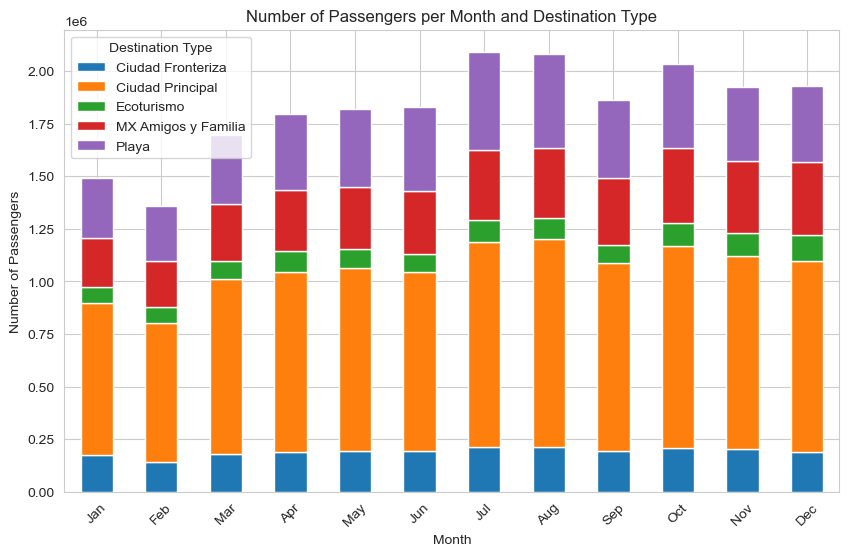

In [48]:
# Convertir la columna 'std' a tipo datetime
df_flights['std'] = pd.to_datetime(df_flights['std'])

# Agregar una nueva columna para el mes
df_flights['month'] = df_flights['std'].dt.month

# Agrupar por mes y tipo de destino, sumando los pasajeros
df_grouped = df_flights.groupby(['month', 'destination_type'])['passengers'].sum().reset_index()

# Pivoteando los datos para tener los tipos de destino como columnas
df_pivot = df_grouped.pivot(index='month', columns='destination_type', values='passengers').fillna(0)

# Crear el gráfico de barras apiladas
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(len(months)), months, rotation=45)

# Configuraciones del gráfico
ax.set_xlabel('Month')
ax.set_ylabel('Number of Passengers')
ax.set_title('Number of Passengers per Month and Destination Type')
ax.legend(title='Destination Type')

# Mostrar el gráfico
plt.show()

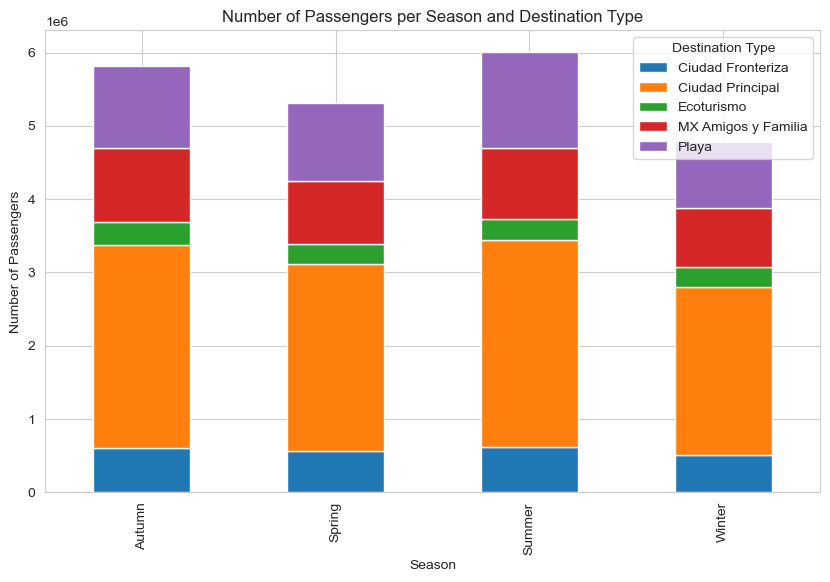

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Convertir la columna 'std' a tipo datetime
df_flights['std'] = pd.to_datetime(df_flights['std'])

# Definir la función para obtener la estación del año
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Agregar una nueva columna para la estación del año
df_flights['season'] = df_flights['std'].dt.month.map(get_season)

# Agrupar por estación del año y tipo de destino, sumando los pasajeros
df_grouped = df_flights.groupby(['season', 'destination_type'])['passengers'].sum().reset_index()

# Pivoteando los datos para tener los tipos de destino como columnas
df_pivot = df_grouped.pivot(index='season', columns='destination_type', values='passengers').fillna(0)

# Crear el gráfico de barras apiladas
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# Configuraciones del gráfico
ax.set_xlabel('Season')
ax.set_ylabel('Number of Passengers')
ax.set_title('Number of Passengers per Season and Destination Type')
ax.legend(title='Destination Type')

# Mostrar el gráfico
plt.show()

In [50]:
df_flights.head()

,flight_id,aeronave,departure_station,arrival_station,destination_type,origin_type,std,sta,capacity,passengers,bookings,ocupacity,duration,shift,month,season
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0,100.000000,long,morning,10,Autumn
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0,94.416244,long,night,7,Summer
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0,100.000000,short,afternoon,6,Summer
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0,100.000000,short,morning,2,Winter
5,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,AJ,AR,Playa,MX Amigos y Familia,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183.0,125.0,100.000000,short,afternoon,9,Autumn


Consideramos que nos es más útil conservar la columna por mes y no por temporada del año.

In [51]:
df_flights.drop('season', axis=1, inplace=True)

In [52]:
df_flights.head()

,flight_id,aeronave,departure_station,arrival_station,destination_type,origin_type,std,sta,capacity,passengers,bookings,ocupacity,duration,shift,month
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0,100.000000,long,morning,10
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0,94.416244,long,night,7
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0,100.000000,short,afternoon,6
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0,100.000000,short,morning,2
5,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,AJ,AR,Playa,MX Amigos y Familia,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183.0,125.0,100.000000,short,afternoon,9


## Encontrar cuantos perecederos se vendieron por vuelo

In [53]:
df_sales.head()

,flight_id,product_type,product_name,quantity,total_sales
0,a05290288259526edd3601160b10e1de,Botanas,Carne Seca Habanero,1,55.0
1,08f6f97437df8db101b050f1110be656,Licores,Jw Red Label,2,240.0
2,4e09c949826a77207868412baeff6d30,Licores,Jack And Coke,8,576.0
3,c3e1568fe46c68d3174681d322d412b3,Licores,Jw Red Label,2,240.0
4,7396e43fb94caca87add7bb1f1611e7e,Vivabus,Vivabus_Gdl.-Nvo. C. Camionera,4,320.0


Filtraremos por perecederos

In [54]:
df_sales['product_type'].value_counts()

product_type
Botanas                 613793
Refrescos               585118
Specials                395760
Licores                 304987
Perecederos             181990
Galletas                143928
Bebidas Calientes       125235
Sopas                   115486
OFERTAS                  38384
Lacteos                  37755
Vivabus                   9819
Transportaciones CUN      3635
Hertz.                    2398
COMBOS CREW               2017
VIVA Taxis                1384
Transportaciones MTY      1220
VivaTransfer               435
Antros                     388
VIVA PLAY                  386
Transportaciones TLC       239
Alimentos Charter            4
Name: count, dtype: int64

In [55]:
# Filtrar por productos perecederos y agrupar por flight_id
df_perecederos = df_sales[df_sales['product_type'] == 'Perecederos'].groupby('flight_id')['quantity'].sum().reset_index()

# Renombrar la columna quantity como perecederos_quantity
df_perecederos.rename(columns={'quantity': 'perecederos_quantity'}, inplace=True)

df_perecederos

,flight_id,perecederos_quantity
0,00004a718edba9d9ef878d08f02ae057,4
1,0000cd79c0c3a9c309df6064dcacaeea,1
2,000163f0df9cbfc35c4c06645ec512f6,2
3,00017be73003a570dd426b155762769c,11
4,0001a43836c338f8d8650aefb11672c9,10
...,...,...
87443,fffdc2087e0825d65bdfd235d4622a9f,3
87444,fffe4a9c19ae2320e76f02939fdff957,3
87445,ffff138536f249f69340e0a8336f94a4,6
87446,ffff782f2ae79e385a016c00fbd994b8,3


In [56]:
# Calcular el recuento de ocurrencias de cada Flight_ID
flight_id_counts = df_perecederos['flight_id'].value_counts()
flight_id_counts

flight_id
00004a718edba9d9ef878d08f02ae057    1
aa5a1f79dfc485992a70221259e72434    1
aa5f970e7a3ea55fc6b5ed894fb07c08    1
aa5f96c3f52df0f72f05a303e0c5a5c7    1
aa5e9bf1168cd5737bad7282d0902193    1
                                   ..
547a8ca14c18edfe1aff5877f121d9d3    1
547a04a6055b789e61c8f9ab2e9b2235    1
5479d31455c2605362d6a3993b0f3728    1
547763a7952a519b87c0efac020829f2    1
ffff881a59bc5274e97ea3c4de344e05    1
Name: count, Length: 87448, dtype: int64

In [57]:
flight_id_counts.value_counts()

count
1    87448
Name: count, dtype: int64

## Merge

In [58]:
df_merged = pd.merge(df_flights, df_perecederos[['flight_id', 'perecederos_quantity']], on='flight_id', how='inner')
df_merged

,flight_id,aeronave,departure_station,arrival_station,destination_type,origin_type,std,sta,capacity,passengers,bookings,ocupacity,duration,shift,month,perecederos_quantity
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0,100.000000,long,morning,10,4
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0,94.416244,long,night,7,1
2,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0,100.000000,short,morning,2,3
3,8fa200a3d1ce23ef6802a74847e030b8,XA-VXC,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-10-10 00:55:00,2023-10-10 04:55:00,240,210.0,116.0,100.000000,long,night,10,5
4,281ae1ba6c678889e306cd9cae468daf,XA-VAM,AO,AR,Playa,Ciudad Principal,2023-12-13 12:10:00,2023-12-13 12:50:00,180,110.0,78.0,100.000000,short,afternoon,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85106,9bbd9f3a2bbcaeae864d17e3ee544d2c,XA-VAE,AT,BT,Playa,Ciudad Principal,2023-12-06 12:50:00,2023-12-06 16:10:00,186,191.0,119.0,97.382199,long,afternoon,12,5
85107,d9ef769565064b1ff1ad90d6d18f69cb,XA-VYF,AO,BT,Playa,Ciudad Principal,2023-12-26 06:20:00,2023-12-26 10:10:00,180,166.0,89.0,100.000000,long,morning,12,4
85108,598035669a4f0fa2ce1207977932df9e,XA-VAI,AW,BT,Playa,Ciudad Principal,2023-12-28 10:25:00,2023-12-28 13:50:00,180,142.0,54.0,100.000000,long,morning,12,8
85109,cc7c1c5e6fd132fd0bdab3a35aac33c0,XA-VBK,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189.0,86.0,100.000000,long,morning,12,15


In [59]:
df_merged = df_merged.drop(['flight_id', 'aeronave', 'departure_station', 'arrival_station', 'origin_type', 'std', 'sta', 'capacity', 'passengers', 'bookings'], axis=1)

In [60]:
df_merged

,destination_type,ocupacity,duration,shift,month,perecederos_quantity
0,Ciudad Fronteriza,100.000000,long,morning,10,4
1,MX Amigos y Familia,94.416244,long,night,7,1
2,Playa,100.000000,short,morning,2,3
3,MX Amigos y Familia,100.000000,long,night,10,5
4,Playa,100.000000,short,afternoon,12,2
...,...,...,...,...,...,...
85106,Playa,97.382199,long,afternoon,12,5
85107,Playa,100.000000,long,morning,12,4
85108,Playa,100.000000,long,morning,12,8
85109,Playa,100.000000,long,morning,12,15


## Entrenar el modelo

In [61]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [62]:
print(df_merged.shape)
df_merged.head()

(85111, 6)


,destination_type,ocupacity,duration,shift,month,perecederos_quantity
0,Ciudad Fronteriza,100.000000,long,morning,10,4
1,MX Amigos y Familia,94.416244,long,night,7,1
2,Playa,100.000000,short,morning,2,3
3,MX Amigos y Familia,100.000000,long,night,10,5
4,Playa,100.000000,short,afternoon,12,2


In [63]:
df_merged_new = df_merged.copy()

In [64]:
le_count = 0
for col in df_merged_new.columns[1:]:
    if df_merged_new[col].dtype == 'object':
        if len(list(df_merged_new[col].unique())) <= 2:
            le.fit(df_merged_new[col])
            df_merged_new[col] = le.transform(df_merged_new[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))
df_merged_new.head()

1 columns were label encoded.


,destination_type,ocupacity,duration,shift,month,perecederos_quantity
0,Ciudad Fronteriza,100.000000,0,morning,10,4
1,MX Amigos y Familia,94.416244,0,night,7,1
2,Playa,100.000000,1,morning,2,3
3,MX Amigos y Familia,100.000000,0,night,10,5
4,Playa,100.000000,1,afternoon,12,2


In [65]:
# convert categorical to into dummy
df_merged_new = pd.get_dummies(df_merged_new, drop_first=True)
df_merged_new.head()

,ocupacity,duration,month,perecederos_quantity,destination_type_Ciudad Principal,destination_type_Ecoturismo,destination_type_MX Amigos y Familia,destination_type_Playa,shift_morning,shift_night
0,100.000000,0,10,4,False,False,False,False,True,False
1,94.416244,0,7,1,False,False,True,False,False,True
2,100.000000,1,2,3,False,False,False,True,True,False
3,100.000000,0,10,5,False,False,True,False,False,True
4,100.000000,1,12,2,False,False,False,True,False,False


In [66]:
df_merged_trans = df_merged_new.copy()
# Definir el target como 'passengers'
df_merged_trans['Target'] = df_merged_trans['perecederos_quantity']

# Eliminar columnas no deseadas
df_merged_trans = df_merged_trans.drop(['perecederos_quantity'], axis=1)

# Calcular correlaciones
correlations = df_merged_trans.corr()['Target'].sort_values()

# Imprimir correlaciones más positivas y más negativas
print('Correlaciones más positivas: \n', correlations.tail(5))
print('\nCorrelaciones más negativas: \n', correlations.head(5))

Correlaciones más positivas: 
 shift_morning            -0.010435
ocupacity                -0.005787
month                     0.017751
destination_type_Playa    0.269582
Target                    1.000000
Name: Target, dtype: float64

Correlaciones más negativas: 
 duration                               -0.317763
destination_type_Ciudad Principal      -0.206749
shift_night                            -0.174655
destination_type_MX Amigos y Familia   -0.084517
destination_type_Ecoturismo            -0.050545
Name: Target, dtype: float64


<Axes: >

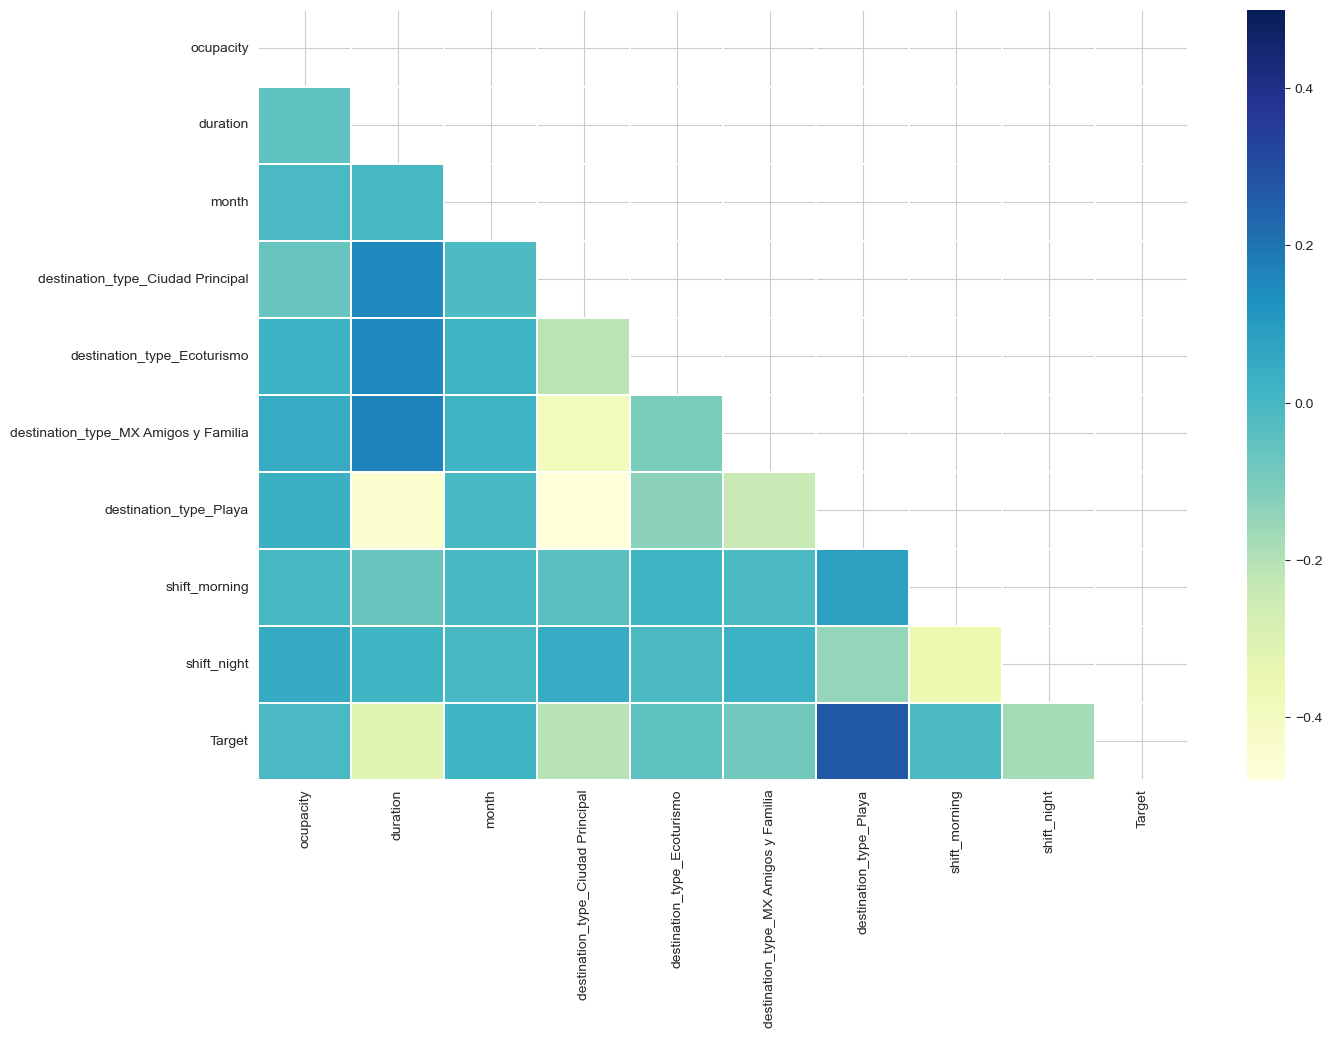

In [67]:
# Calculate correlations
corr = df_merged_trans.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu")

### Feature Scaling

In [68]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_merged_new.columns)
HR_col.remove('perecederos_quantity')
for col in HR_col:
    df_merged_new[col] = df_merged_new[col].astype(float)
    df_merged_new[[col]] = scaler.fit_transform(df_merged_new[[col]])
df_merged_new['perecederos_quantity'] = pd.to_numeric(df_merged_new['perecederos_quantity'], downcast='float')
df_merged_new.head()

,ocupacity,duration,month,perecederos_quantity,destination_type_Ciudad Principal,destination_type_Ecoturismo,destination_type_MX Amigos y Familia,destination_type_Playa,shift_morning,shift_night
0,5.000000,0.0,4.090909,4.0,0.0,0.0,0.0,0.0,5.0,0.0
1,3.150381,0.0,2.727273,1.0,0.0,0.0,5.0,0.0,0.0,5.0
2,5.000000,5.0,0.454545,3.0,0.0,0.0,0.0,5.0,5.0,0.0
3,5.000000,0.0,4.090909,5.0,0.0,0.0,5.0,0.0,0.0,5.0
4,5.000000,5.0,5.000000,2.0,0.0,0.0,0.0,5.0,0.0,0.0


In [69]:
target = df_merged_new['perecederos_quantity']

In [70]:
variables = df_merged_new.drop('perecederos_quantity', axis=1)

In [71]:
variables

,ocupacity,duration,month,destination_type_Ciudad Principal,destination_type_Ecoturismo,destination_type_MX Amigos y Familia,destination_type_Playa,shift_morning,shift_night
0,5.000000,0.0,4.090909,0.0,0.0,0.0,0.0,5.0,0.0
1,3.150381,0.0,2.727273,0.0,0.0,5.0,0.0,0.0,5.0
2,5.000000,5.0,0.454545,0.0,0.0,0.0,5.0,5.0,0.0
3,5.000000,0.0,4.090909,0.0,0.0,5.0,0.0,0.0,5.0
4,5.000000,5.0,5.000000,0.0,0.0,0.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
85106,4.132853,0.0,5.000000,0.0,0.0,0.0,5.0,0.0,0.0
85107,5.000000,0.0,5.000000,0.0,0.0,0.0,5.0,5.0,0.0
85108,5.000000,0.0,5.000000,0.0,0.0,0.0,5.0,5.0,0.0
85109,5.000000,0.0,5.000000,0.0,0.0,0.0,5.0,5.0,0.0


In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(variables, target, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_entrenamiento, y_entrenamiento)

# Predecir en el conjunto de prueba
predicciones = modelo.predict(X_prueba)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_prueba, predicciones)
print('Error cuadrático medio:', mse)

# Calcular el coeficiente de determinación (R-cuadrado)
r2 = r2_score(y_prueba, predicciones)
print('Coeficiente de determinación (R-cuadrado):', r2)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_prueba, predicciones)
print('Error absoluto medio (MAE):', mae)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)
print('Raíz del error cuadrático medio (RMSE):', rmse)

Error cuadrático medio: 16.148917300420642
Coeficiente de determinación (R-cuadrado): 0.17253924975623547
Error absoluto medio (MAE): 2.924876858153115
Raíz del error cuadrático medio (RMSE): 4.018571549745088


### Repetir procedimiento para 2024

In [73]:
df_perecederos_test = pd.read_csv('prediction_passangers.csv')

In [74]:
df_perecederos_test.head()

,destination_type,capacity,duration,shift,month,passengers
0,Playa,186,1,morning,1,163
1,Playa,180,1,morning,1,159
2,MX Amigos y Familia,240,1,morning,1,203
3,Playa,186,1,afternoon,1,165
4,Playa,180,1,afternoon,1,160


In [75]:
df_perecederos_test['ocupacity'] = (df_perecederos_test['passengers']/df_perecederos_test['capacity'])*100
df_perecederos_test['ocupacity'] = df_perecederos_test['ocupacity'].clip(upper=100)

In [76]:
df_perecederos_test.head()

,destination_type,capacity,duration,shift,month,passengers,ocupacity
0,Playa,186,1,morning,1,163,87.634409
1,Playa,180,1,morning,1,159,88.333333
2,MX Amigos y Familia,240,1,morning,1,203,84.583333
3,Playa,186,1,afternoon,1,165,88.709677
4,Playa,180,1,afternoon,1,160,88.888889


In [86]:
df_perecederos_test = df_perecederos_test.drop(columns=['passengers', 'capacity'])

In [87]:
# convert categorical to into dummy
df_perecederos_test_new = pd.get_dummies(df_perecederos_test, drop_first=True)
df_perecederos_test_new.head()

,duration,month,ocupacity,destination_type_Ciudad Principal,destination_type_Ecoturismo,destination_type_MX Amigos y Familia,destination_type_Playa,shift_morning,shift_night
0,1,1,87.634409,False,False,False,True,True,False
1,1,1,88.333333,False,False,False,True,True,False
2,1,1,84.583333,False,False,True,False,True,False
3,1,1,88.709677,False,False,False,True,False,False
4,1,1,88.888889,False,False,False,True,False,False


In [88]:
df_perecederos_test_new['perecederos_quantity'] = None

In [89]:
df_perecederos_test_new.head()

,duration,month,ocupacity,destination_type_Ciudad Principal,destination_type_Ecoturismo,destination_type_MX Amigos y Familia,destination_type_Playa,shift_morning,shift_night,perecederos_quantity
0,1,1,87.634409,False,False,False,True,True,False,None
1,1,1,88.333333,False,False,False,True,True,False,None
2,1,1,84.583333,False,False,True,False,True,False,None
3,1,1,88.709677,False,False,False,True,False,False,None
4,1,1,88.888889,False,False,False,True,False,False,None


In [90]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_perecederos_test_new.columns)
HR_col.remove('perecederos_quantity')
for col in HR_col:
    df_perecederos_test_new[col] = df_perecederos_test_new[col].astype(float)
    df_perecederos_test_new[[col]] = scaler.fit_transform(df_perecederos_test_new[[col]])
df_perecederos_test_new['perecederos_quantity'] = pd.to_numeric(df_perecederos_test_new['perecederos_quantity'], downcast='float')
df_perecederos_test_new.head()

,duration,month,ocupacity,destination_type_Ciudad Principal,destination_type_Ecoturismo,destination_type_MX Amigos y Familia,destination_type_Playa,shift_morning,shift_night,perecederos_quantity
0,5.0,0.0,2.419355,0.0,0.0,0.0,5.0,5.0,0.0,NaN
1,5.0,0.0,2.684211,0.0,0.0,0.0,5.0,5.0,0.0,NaN
2,5.0,0.0,1.263158,0.0,0.0,5.0,0.0,5.0,0.0,NaN
3,5.0,0.0,2.826825,0.0,0.0,0.0,5.0,0.0,0.0,NaN
4,5.0,0.0,2.894737,0.0,0.0,0.0,5.0,0.0,0.0,NaN


In [91]:
target = df_perecederos_test_new['perecederos_quantity']

In [92]:
variables = df_perecederos_test_new.drop('perecederos_quantity', axis=1)

In [93]:
variables.head(5)

,duration,month,ocupacity,destination_type_Ciudad Principal,destination_type_Ecoturismo,destination_type_MX Amigos y Familia,destination_type_Playa,shift_morning,shift_night
0,5.0,0.0,2.419355,0.0,0.0,0.0,5.0,5.0,0.0
1,5.0,0.0,2.684211,0.0,0.0,0.0,5.0,5.0,0.0
2,5.0,0.0,1.263158,0.0,0.0,5.0,0.0,5.0,0.0
3,5.0,0.0,2.826825,0.0,0.0,0.0,5.0,0.0,0.0
4,5.0,0.0,2.894737,0.0,0.0,0.0,5.0,0.0,0.0


In [99]:
variables = df_perecederos_test_new_copy[['ocupacity', 'duration', 'month', 'destination_type_Ciudad Principal', 'destination_type_Ecoturismo', 'destination_type_MX Amigos y Familia', 'destination_type_Playa', 'shift_morning', 'shift_night']]

In [100]:
df_perecederos_test_new_copy = df_perecederos_test_new.copy()
df_perecederos_test_new_copy['perecederos_quantity'] = modelo.predict(variables)
df_perecederos_test_new_copy['perecederos_quantity'] = np.ceil(df_perecederos_test_new_copy['perecederos_quantity']).astype(int)
df_perecederos_test_new_copy

,duration,month,ocupacity,destination_type_Ciudad Principal,destination_type_Ecoturismo,destination_type_MX Amigos y Familia,destination_type_Playa,shift_morning,shift_night,perecederos_quantity
0,5.0,0.0,2.419355,0.0,0.0,0.0,5.0,5.0,0.0,6
1,5.0,0.0,2.684211,0.0,0.0,0.0,5.0,5.0,0.0,6
2,5.0,0.0,1.263158,0.0,0.0,5.0,0.0,5.0,0.0,5
3,5.0,0.0,2.826825,0.0,0.0,0.0,5.0,0.0,0.0,7
4,5.0,0.0,2.894737,0.0,0.0,0.0,5.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...
10046,0.0,0.0,2.052632,0.0,0.0,0.0,5.0,5.0,0.0,9
10047,0.0,0.0,1.593301,0.0,0.0,0.0,5.0,0.0,0.0,10
10048,0.0,0.0,2.011885,0.0,0.0,0.0,5.0,5.0,0.0,9
10049,0.0,0.0,2.011885,0.0,0.0,0.0,5.0,5.0,0.0,9


In [101]:
df_perecederos_test_new_copy.to_csv('prediction_perecederos.csv')